---
title: "Artist Classification"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

# Artists

In [2]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
artists = pd.read_csv('../data/clean_data/artists.csv')

# what does that data look like? 
artists.head(20)

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3
0,Green Day,7oPftvlwr6VrsViSDV7fJY,0.435219,0.895942,-4.404705,0.071970,0.029052,2.420668e-02,0.210100,0.658430,140.041634,189080.946429,D major,rock,NaN,NaN
1,Dusty Springfield,5zaXYwewAXedKNCff45U5l,0.485341,0.498333,-10.186623,0.043030,0.518770,1.524729e-02,0.222696,0.565521,116.199674,195254.239130,D major,jazz,NaN,NaN
2,Hozier,2FXC3k01G6Gw61bmprjgqS,0.448021,0.516437,-7.487792,0.046327,0.384334,4.871918e-02,0.136029,0.339523,116.836062,241630.729167,G major,rock,NaN,NaN
3,Ms. Lauryn Hill,2Mu5NfyYm8n5iTomuKAEHl,0.652385,0.493627,-12.291385,0.302931,0.270838,4.171400e-04,0.258950,0.610846,102.295308,281465.692308,C# major,soul,NaN,NaN
4,Incubus,3YcBF2ttyueytpXtEzn1Za,0.508414,0.786576,-6.192253,0.057951,0.080398,7.619580e-02,0.181052,0.432140,134.341747,245848.595960,A major,funk,NaN,NaN
5,Farruko,329e4yvIujISKGKz1BZZbO,0.695963,0.745696,-5.090474,0.100282,0.214355,5.877183e-04,0.217191,0.597800,123.408267,223879.296296,B minor,latin,NaN,NaN
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0.530749,0.787411,-5.798831,0.067306,0.068541,5.678086e-02,0.170656,0.500953,120.363904,259293.369863,C major,funk,rock,NaN
7,Kali Uchis,1U1el3k54VvEUzo3ybLPlM,0.636603,0.555097,-7.841090,0.067583,0.286546,2.188057e-02,0.191645,0.473921,117.950526,180635.435897,F# minor,pop,NaN,NaN
8,Swedish House Mafia,1h6Cn3P4NGzXbaXidqURXs,0.585440,0.657280,-7.711320,0.090740,0.082635,3.906170e-01,0.215492,0.201592,124.436000,269980.920000,D major,edm,NaN,NaN
9,Dean Martin,49e4v89VmlDcFCMyDv9wQ9,0.495437,0.428639,-10.407168,0.039445,0.689061,3.668141e-03,0.200671,0.532756,117.147185,162275.126050,D# major,jazz,NaN,NaN


In [3]:
# display rows where genre1 = NaN
artists[artists['genre1'].isnull()]

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3
193,Roger Miller,1RP2UpEaRzkF0Id3JigqD8,0.521208,0.431797,-12.92274,0.060275,0.736829,0.130657,0.170462,0.595644,113.374175,161172.032468,D major,NaN,NaN,NaN
196,The Beach Boys,3oDbviiivRWhXwIE8hxkVV,0.498619,0.445967,-12.14511,0.083242,0.381031,0.128259,0.184383,0.550309,120.514409,153459.132992,C major,NaN,NaN,NaN


In [4]:
# delete Roger Miller
artists = artists.drop(artists[artists['artist_name'] == 'Roger Miller'].index)

# set genre1 for 'The Beach Boys' to 'rock'
artists.loc[artists['artist_name'] == 'The Beach Boys', 'genre1'] = 'rock'

# look at rows where artist_name == The Beach Boys
artists[artists['artist_name'] == 'The Beach Boys']

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3
196,The Beach Boys,3oDbviiivRWhXwIE8hxkVV,0.498619,0.445967,-12.14511,0.083242,0.381031,0.128259,0.184383,0.550309,120.514409,153459.132992,C major,rock,NaN,NaN


In [5]:
artists.shape

(396, 16)

## Initial attempt to create primary genre

In [6]:
# show all rows where genre2 is not NaN
pd.set_option('display.max_rows', None)
artists[artists['genre2'].notnull()]

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0.530749,0.787411,-5.798831,0.067306,0.068541,0.056781,0.170656,0.500953,120.363904,259293.369863,C major,funk,rock,NaN
12,Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,0.660518,0.638747,-5.278169,0.099770,0.150939,0.011255,0.215941,0.310833,126.254831,227478.325301,C# major,hip hop,rap,NaN
13,SZA,7tYKF4w9nC0nq9CsPZTHyP,0.625059,0.540926,-8.036574,0.146347,0.368444,0.023380,0.173090,0.407115,114.773882,200462.691176,C# major,pop,rap,NaN
25,Shakira,0EmeFodog0BfCgMzAIvKQp,0.705754,0.677343,-6.272053,0.061410,0.266872,0.004479,0.156847,0.602860,127.281342,211600.070175,C major,latin,pop,NaN
29,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,0.744207,0.628360,-6.840696,0.145309,0.148938,0.039704,0.224577,0.325670,123.310016,149671.184783,C# major,hip hop,rap,NaN
32,Aretha Franklin,7nwUJBm0HE4ZxD3f5cy5ok,0.512930,0.458223,-10.058798,0.056837,0.566611,0.003254,0.204630,0.525476,120.753077,216225.058824,C major,jazz,soul,NaN
33,Louis Armstrong,19eLuQmk9aCobbVDHc6eek,0.558063,0.310496,-12.734251,0.108066,0.805517,0.116357,0.290068,0.562275,112.402596,208678.606272,G# major,jazz,soul,NaN
35,Ozuna,1i8SpTcr7yvPOmcqrbnVXY,0.756770,0.682393,-5.212066,0.105639,0.216649,0.006818,0.158925,0.628967,127.503082,200520.893443,F minor,latin,pop,NaN
39,Lil Peep,2kCcBybjl3SAtIcwdWpUe3,0.595200,0.610478,-7.040356,0.073646,0.115313,0.033544,0.178250,0.282656,123.553667,187059.722222,D major,hip hop,rap,NaN
40,Rauw Alejandro,1mcTU81TzQhprhouKaTkpq,0.742934,0.700500,-4.248171,0.114092,0.281322,0.013584,0.210970,0.488305,121.941368,207114.631579,B minor,latin,pop,NaN


In [7]:
# all artists that have numerous genres
artists1 = artists[artists['genre2'].notnull()]

# convert all pop to NaN in genre1, genre2, and genre3
artists1.loc[artists1['genre1'] == 'pop', 'genre1'] = np.nan
artists1.loc[artists1['genre2'] == 'pop', 'genre2'] = np.nan
artists1.loc[artists1['genre3'] == 'pop', 'genre3'] = np.nan

# if genre1 = NaN, set genre1 to genre2
artists1.loc[artists1['genre1'].isnull(), 'genre1'] = artists1['genre2']

# if genre2 = NaN, set genre2 to genre3
artists1.loc[artists1['genre2'].isnull(), 'genre2'] = artists1['genre3']

# if genre3 = genre2, set genre3 to NaN
artists1.loc[artists1['genre3'] == artists1['genre2'], 'genre3'] = np.nan

# if genre2 = genre1, set genre2 to NaN
artists1.loc[artists1['genre2'] == artists1['genre1'], 'genre2'] = np.nan

# new list of all artists that have numerous genres
artists2 = artists1[artists1['genre2'].notnull()]

print("Initial number of artists with multiple genres: ", len(artists1), "\nNumber of artists with multiple genres after removing pop: ", len(artists2))

Initial number of artists with multiple genres:  76 
Number of artists with multiple genres after removing pop:  61


In [8]:
artists2

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0.530749,0.787411,-5.798831,0.067306,0.068541,0.056781,0.170656,0.500953,120.363904,259293.369863,C major,funk,rock,NaN
12,Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,0.660518,0.638747,-5.278169,0.099770,0.150939,0.011255,0.215941,0.310833,126.254831,227478.325301,C# major,hip hop,rap,NaN
29,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,0.744207,0.628360,-6.840696,0.145309,0.148938,0.039704,0.224577,0.325670,123.310016,149671.184783,C# major,hip hop,rap,NaN
32,Aretha Franklin,7nwUJBm0HE4ZxD3f5cy5ok,0.512930,0.458223,-10.058798,0.056837,0.566611,0.003254,0.204630,0.525476,120.753077,216225.058824,C major,jazz,soul,NaN
33,Louis Armstrong,19eLuQmk9aCobbVDHc6eek,0.558063,0.310496,-12.734251,0.108066,0.805517,0.116357,0.290068,0.562275,112.402596,208678.606272,G# major,jazz,soul,NaN
39,Lil Peep,2kCcBybjl3SAtIcwdWpUe3,0.595200,0.610478,-7.040356,0.073646,0.115313,0.033544,0.178250,0.282656,123.553667,187059.722222,D major,hip hop,rap,NaN
48,Ray Charles,1eYhYunlNJlDoQhtYBvPsi,0.502172,0.320394,-12.750496,0.061259,0.756405,0.073499,0.162529,0.508856,110.565036,210096.192000,G# major,jazz,soul,NaN
49,Lil Uzi Vert,4O15NlyKLIASxsJ0PrXPfz,0.742184,0.639299,-6.055231,0.216404,0.144888,0.008883,0.211707,0.428294,134.485932,204814.061224,C# major,hip hop,rap,NaN
51,Lil Wayne,55Aa2cqylxrFIXC767Z865,0.686506,0.701424,-5.935353,0.248861,0.124192,0.000322,0.231096,0.555244,121.714921,226104.736573,C# major,hip hop,rap,NaN
62,Drake,3TVXtAsR1Inumwj472S9r4,0.652035,0.545684,-8.301823,0.216118,0.229912,0.008093,0.196943,0.349412,119.020992,240026.792308,C# major,hip hop,rap,NaN


In [9]:
# import all genre data
country = pd.read_csv('../data/raw_data/genre_data/country.csv')
edm = pd.read_csv('../data/raw_data/genre_data/edm.csv')
funk = pd.read_csv('../data/raw_data/genre_data/funk.csv')
hip_hop = pd.read_csv('../data/raw_data/genre_data/hip_hop.csv')
jazz = pd.read_csv('../data/raw_data/genre_data/jazz.csv')
latin = pd.read_csv('../data/raw_data/genre_data/latin.csv')
pop = pd.read_csv('../data/raw_data/genre_data/pop.csv')
rap = pd.read_csv('../data/raw_data/genre_data/rap.csv')
rock = pd.read_csv('../data/raw_data/genre_data/rock.csv')
soul = pd.read_csv('../data/raw_data/genre_data/soul.csv')

# looking at one genre
rap.head()

,id,name,popularity,followers.total,genre
0,3TVXtAsR1Inumwj472S9r4,Drake,96,86309115,rap
1,1RyvyyTE3xzB2ZywiAwp0i,Future,93,16512389,rap
2,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,94,24762907,rap
3,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,94,28481904,rap
4,0iEtIxbK0KxaSlF7G42ZOp,Metro Boomin,93,7622134,rap


In [10]:
# create new column that is 1 for row 1, 2 for row 2, etc.
rap['Rank'] = range(1, len(rap) + 1)

# what does this look like now? 
rap.head()

,id,name,popularity,followers.total,genre,Rank
0,3TVXtAsR1Inumwj472S9r4,Drake,96,86309115,rap,1
1,1RyvyyTE3xzB2ZywiAwp0i,Future,93,16512389,rap,2
2,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,94,24762907,rap,3
3,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,94,28481904,rap,4
4,0iEtIxbK0KxaSlF7G42ZOp,Metro Boomin,93,7622134,rap,5


In [11]:
# do this for all other genres
country['Rank'] = range(1, len(country) + 1)
edm['Rank'] = range(1, len(edm) + 1)
funk['Rank'] = range(1, len(funk) + 1)
hip_hop['Rank'] = range(1, len(hip_hop) + 1)
jazz['Rank'] = range(1, len(jazz) + 1)
latin['Rank'] = range(1, len(latin) + 1)
pop['Rank'] = range(1, len(pop) + 1)
rock['Rank'] = range(1, len(rock) + 1)
soul['Rank'] = range(1, len(soul) + 1)

In [12]:
# now each artist has a rank value that shows how important they are to that genre (according to spotify)


# Create a dictionary for each genre with artist names as keys and ranks as values
genre_rank_dicts = {
    'country': dict(zip(country['name'], country['Rank'])),
    'edm': dict(zip(edm['name'], edm['Rank'])),
    'funk': dict(zip(funk['name'], funk['Rank'])),
    'hip_hop': dict(zip(hip_hop['name'], hip_hop['Rank'])),
    'jazz': dict(zip(jazz['name'], jazz['Rank'])),
    'latin': dict(zip(latin['name'], latin['Rank'])),
    'pop': dict(zip(pop['name'], pop['Rank'])),
    'rap': dict(zip(rap['name'], rap['Rank'])),
    'rock': dict(zip(rock['name'], rock['Rank'])),
    'soul': dict(zip(soul['name'], soul['Rank']))
}

# Function to find the primary genre based on the lowest rank
def get_primary_genre(row):
    genres = [row['genre1'], row['genre2'], row['genre3']]
    # Get the ranks of the genres for the artist
    ranks = [genre_rank_dicts.get(genre, {}).get(row['artist_name'], float('inf')) for genre in genres]
    
    # If all ranks are 'inf', it means none of the genres are ranked for this artist
    if all(rank == float('inf') for rank in ranks):
        return 'CHECK'
    
    # Find the minimum rank
    min_rank = min(ranks)
    
    # If we have a unique minimum rank, we return the corresponding genre
    if ranks.count(min_rank) == 1:
        return genres[ranks.index(min_rank)]
    
    # If there's a tie, we return 'CHECK'
    return 'CHECK'

# Apply the function to each row in the artists2 DataFrame
artists2['primary_genre'] = artists2.apply(get_primary_genre, axis=1)

artists2

/var/folders/lb/dk54cbx965z7nj61zps2fzr00000gn/T/ipykernel_70872/3145626996.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists2['primary_genre'] = artists2.apply(get_primary_genre, axis=1)


,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3,primary_genre
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0.530749,0.787411,-5.798831,0.067306,0.068541,0.056781,0.170656,0.500953,120.363904,259293.369863,C major,funk,rock,NaN,funk
12,Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,0.660518,0.638747,-5.278169,0.099770,0.150939,0.011255,0.215941,0.310833,126.254831,227478.325301,C# major,hip hop,rap,NaN,rap
29,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,0.744207,0.628360,-6.840696,0.145309,0.148938,0.039704,0.224577,0.325670,123.310016,149671.184783,C# major,hip hop,rap,NaN,rap
32,Aretha Franklin,7nwUJBm0HE4ZxD3f5cy5ok,0.512930,0.458223,-10.058798,0.056837,0.566611,0.003254,0.204630,0.525476,120.753077,216225.058824,C major,jazz,soul,NaN,jazz
33,Louis Armstrong,19eLuQmk9aCobbVDHc6eek,0.558063,0.310496,-12.734251,0.108066,0.805517,0.116357,0.290068,0.562275,112.402596,208678.606272,G# major,jazz,soul,NaN,jazz
39,Lil Peep,2kCcBybjl3SAtIcwdWpUe3,0.595200,0.610478,-7.040356,0.073646,0.115313,0.033544,0.178250,0.282656,123.553667,187059.722222,D major,hip hop,rap,NaN,rap
48,Ray Charles,1eYhYunlNJlDoQhtYBvPsi,0.502172,0.320394,-12.750496,0.061259,0.756405,0.073499,0.162529,0.508856,110.565036,210096.192000,G# major,jazz,soul,NaN,jazz
49,Lil Uzi Vert,4O15NlyKLIASxsJ0PrXPfz,0.742184,0.639299,-6.055231,0.216404,0.144888,0.008883,0.211707,0.428294,134.485932,204814.061224,C# major,hip hop,rap,NaN,rap
51,Lil Wayne,55Aa2cqylxrFIXC767Z865,0.686506,0.701424,-5.935353,0.248861,0.124192,0.000322,0.231096,0.555244,121.714921,226104.736573,C# major,hip hop,rap,NaN,rap
62,Drake,3TVXtAsR1Inumwj472S9r4,0.652035,0.545684,-8.301823,0.216118,0.229912,0.008093,0.196943,0.349412,119.020992,240026.792308,C# major,hip hop,rap,NaN,rap


In [13]:
# create column in artists primary_genre that is equal to genre1
artists['primary_genre'] = artists['genre1']

artists.head()

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3,primary_genre
0,Green Day,7oPftvlwr6VrsViSDV7fJY,0.435219,0.895942,-4.404705,0.071970,0.029052,0.024207,0.210100,0.658430,140.041634,189080.946429,D major,rock,NaN,NaN,rock
1,Dusty Springfield,5zaXYwewAXedKNCff45U5l,0.485341,0.498333,-10.186623,0.043030,0.518770,0.015247,0.222696,0.565521,116.199674,195254.239130,D major,jazz,NaN,NaN,jazz
2,Hozier,2FXC3k01G6Gw61bmprjgqS,0.448021,0.516437,-7.487792,0.046327,0.384334,0.048719,0.136029,0.339523,116.836062,241630.729167,G major,rock,NaN,NaN,rock
3,Ms. Lauryn Hill,2Mu5NfyYm8n5iTomuKAEHl,0.652385,0.493627,-12.291385,0.302931,0.270838,0.000417,0.258950,0.610846,102.295308,281465.692308,C# major,soul,NaN,NaN,soul
4,Incubus,3YcBF2ttyueytpXtEzn1Za,0.508414,0.786576,-6.192253,0.057951,0.080398,0.076196,0.181052,0.432140,134.341747,245848.595960,A major,funk,NaN,NaN,funk


In [14]:
# get list of all artist_id from artists2
artist_ids = artists2['artist_name'].tolist()

# remove all rows from artists where artist_id is in artist_ids
artists = artists[~artists['artist_name'].isin(artist_ids)]

# combine artists and artists2
artists = pd.concat([artists, artists2])

artists.head()

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3,primary_genre
0,Green Day,7oPftvlwr6VrsViSDV7fJY,0.435219,0.895942,-4.404705,0.071970,0.029052,0.024207,0.210100,0.658430,140.041634,189080.946429,D major,rock,NaN,NaN,rock
1,Dusty Springfield,5zaXYwewAXedKNCff45U5l,0.485341,0.498333,-10.186623,0.043030,0.518770,0.015247,0.222696,0.565521,116.199674,195254.239130,D major,jazz,NaN,NaN,jazz
2,Hozier,2FXC3k01G6Gw61bmprjgqS,0.448021,0.516437,-7.487792,0.046327,0.384334,0.048719,0.136029,0.339523,116.836062,241630.729167,G major,rock,NaN,NaN,rock
3,Ms. Lauryn Hill,2Mu5NfyYm8n5iTomuKAEHl,0.652385,0.493627,-12.291385,0.302931,0.270838,0.000417,0.258950,0.610846,102.295308,281465.692308,C# major,soul,NaN,NaN,soul
4,Incubus,3YcBF2ttyueytpXtEzn1Za,0.508414,0.786576,-6.192253,0.057951,0.080398,0.076196,0.181052,0.432140,134.341747,245848.595960,A major,funk,NaN,NaN,funk


In [15]:
artists.shape

(396, 17)

In [16]:
# temp_df with artist_name and primary_genre
temp_df = artists[['artist_name', 'primary_genre']]

# load in the data
artists = pd.read_csv('../data/clean_data/artists.csv')

# delete Roger Miller
artists = artists.drop(artists[artists['artist_name'] == 'Roger Miller'].index)

# set genre1 for 'The Beach Boys' to 'rock'
artists.loc[artists['artist_name'] == 'The Beach Boys', 'genre1'] = 'rock'

# merge artists and temp_df
artists = pd.merge(artists, temp_df, on='artist_name', how='left')

artists.shape

(396, 17)

In [17]:
# Reset all options to default
pd.reset_option('all')

artists.head()

/var/folders/lb/dk54cbx965z7nj61zps2fzr00000gn/T/ipykernel_70872/1651965467.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3,primary_genre
0,Green Day,7oPftvlwr6VrsViSDV7fJY,0.435219,0.895942,-4.404705,0.071970,0.029052,0.024207,0.210100,0.658430,140.041634,189080.946429,D major,rock,NaN,NaN,rock
1,Dusty Springfield,5zaXYwewAXedKNCff45U5l,0.485341,0.498333,-10.186623,0.043030,0.518770,0.015247,0.222696,0.565521,116.199674,195254.239130,D major,jazz,NaN,NaN,jazz
2,Hozier,2FXC3k01G6Gw61bmprjgqS,0.448021,0.516437,-7.487792,0.046327,0.384334,0.048719,0.136029,0.339523,116.836062,241630.729167,G major,rock,NaN,NaN,rock
3,Ms. Lauryn Hill,2Mu5NfyYm8n5iTomuKAEHl,0.652385,0.493627,-12.291385,0.302931,0.270838,0.000417,0.258950,0.610846,102.295308,281465.692308,C# major,soul,NaN,NaN,soul
4,Incubus,3YcBF2ttyueytpXtEzn1Za,0.508414,0.786576,-6.192253,0.057951,0.080398,0.076196,0.181052,0.432140,134.341747,245848.595960,A major,funk,NaN,NaN,funk


In [18]:
artists['primary_genre'].value_counts()

primary_genre
country    50
jazz       48
latin      48
edm        47
funk       45
rock       42
soul       37
pop        34
rap        32
hip hop    13
Name: count, dtype: int64

## Final Creation of Primary Genres

In [19]:
# new proposed list - country, latin, edm, rock, hip hop, soul - cannibalism between hip-hop & rap, jazz & soul, pop has no characteristics, then funk mixed with a bunch of stuff
#  from here we can just remove those labels from the initial data

In [20]:
# load in the data
artists = pd.read_csv('../data/clean_data/artists.csv')

# delete Roger Miller
artists = artists.drop(artists[artists['artist_name'] == 'Roger Miller'].index)

# set genre1 for 'The Beach Boys' to 'rock'
artists.loc[artists['artist_name'] == 'The Beach Boys', 'genre1'] = 'rock'

# what does that data look like? 
artists.head(20)

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3
0,Green Day,7oPftvlwr6VrsViSDV7fJY,0.435219,0.895942,-4.404705,0.071970,0.029052,2.420668e-02,0.210100,0.658430,140.041634,189080.946429,D major,rock,NaN,NaN
1,Dusty Springfield,5zaXYwewAXedKNCff45U5l,0.485341,0.498333,-10.186623,0.043030,0.518770,1.524729e-02,0.222696,0.565521,116.199674,195254.239130,D major,jazz,NaN,NaN
2,Hozier,2FXC3k01G6Gw61bmprjgqS,0.448021,0.516437,-7.487792,0.046327,0.384334,4.871918e-02,0.136029,0.339523,116.836062,241630.729167,G major,rock,NaN,NaN
3,Ms. Lauryn Hill,2Mu5NfyYm8n5iTomuKAEHl,0.652385,0.493627,-12.291385,0.302931,0.270838,4.171400e-04,0.258950,0.610846,102.295308,281465.692308,C# major,soul,NaN,NaN
4,Incubus,3YcBF2ttyueytpXtEzn1Za,0.508414,0.786576,-6.192253,0.057951,0.080398,7.619580e-02,0.181052,0.432140,134.341747,245848.595960,A major,funk,NaN,NaN
5,Farruko,329e4yvIujISKGKz1BZZbO,0.695963,0.745696,-5.090474,0.100282,0.214355,5.877183e-04,0.217191,0.597800,123.408267,223879.296296,B minor,latin,NaN,NaN
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0.530749,0.787411,-5.798831,0.067306,0.068541,5.678086e-02,0.170656,0.500953,120.363904,259293.369863,C major,funk,rock,NaN
7,Kali Uchis,1U1el3k54VvEUzo3ybLPlM,0.636603,0.555097,-7.841090,0.067583,0.286546,2.188057e-02,0.191645,0.473921,117.950526,180635.435897,F# minor,pop,NaN,NaN
8,Swedish House Mafia,1h6Cn3P4NGzXbaXidqURXs,0.585440,0.657280,-7.711320,0.090740,0.082635,3.906170e-01,0.215492,0.201592,124.436000,269980.920000,D major,edm,NaN,NaN
9,Dean Martin,49e4v89VmlDcFCMyDv9wQ9,0.495437,0.428639,-10.407168,0.039445,0.689061,3.668141e-03,0.200671,0.532756,117.147185,162275.126050,D# major,jazz,NaN,NaN


In [21]:
# number of intiial artists 
total_artists = len(artists)

# we are removing hip hop, jazz, funk, and pop - convert all to NaN in genre1, genre2, and genre3

# pop
artists.loc[artists['genre1'] == 'pop', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'pop', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'pop', 'genre3'] = np.nan

# # hip hop
# artists.loc[artists['genre1'] == 'hip hop', 'genre1'] = np.nan
# artists.loc[artists['genre2'] == 'hip hop', 'genre2'] = np.nan
# artists.loc[artists['genre3'] == 'hip hop', 'genre3'] = np.nan

# RAP
artists.loc[artists['genre1'] == 'rap', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'rap', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'rap', 'genre3'] = np.nan

# jazz
artists.loc[artists['genre1'] == 'jazz', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'jazz', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'jazz', 'genre3'] = np.nan

# funk
artists.loc[artists['genre1'] == 'funk', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'funk', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'funk', 'genre3'] = np.nan

# if genre1 = NaN, set genre1 to genre2
artists.loc[artists['genre1'].isnull(), 'genre1'] = artists['genre2']

# if genre2 = NaN, set genre2 to genre3
artists.loc[artists['genre2'].isnull(), 'genre2'] = artists['genre3']

# if genre1 = NaN, set genre1 to genre2 - again to account for if rap is the only genre left (starting at genre3)
artists.loc[artists['genre1'].isnull(), 'genre1'] = artists['genre2']

# if genre3 = genre2, set genre3 to NaN
artists.loc[artists['genre3'] == artists['genre2'], 'genre3'] = np.nan

# if genre2 = genre1, set genre2 to NaN
artists.loc[artists['genre2'] == artists['genre1'], 'genre2'] = np.nan

# delete rows where genre1 is NaN
artists = artists[artists['genre1'].notnull()]

print("Initial number of artists with multiple genres: ", total_artists, "\nNumber of artists with multiple genres after removing pop: ", len(artists))

Initial number of artists with multiple genres:  396 
Number of artists with multiple genres after removing pop:  286


In [22]:
# list of all artists that have numerous genres
artists[artists['genre2'].notnull()]

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3
81,Jelly Roll,19k8AgwwTSxeaxkOuCQEJs,0.651404,0.686099,-7.158605,0.145536,0.121064,0.000347,0.231000,0.434363,124.123838,212034.149682,B minor,country,hip hop,NaN
124,Jason Aldean,3FfvYsEGaIb52QPXhg4DcH,0.537811,0.726670,-5.936897,0.101675,0.194751,0.000078,0.219803,0.541486,133.956373,195562.859459,G major,country,rock,NaN
145,Creedence Clearwater Revival,3IYUhFvPQItj6xySrBmZkd,0.626183,0.600086,-10.005151,0.041388,0.161986,0.154077,0.127885,0.712938,123.325290,232287.419355,D major,country,rock,NaN
210,Kodak Black,46SHBwWsqBkxI7EeeBEQG7,0.737292,0.604830,-6.841348,0.257427,0.166053,0.000136,0.162398,0.437120,130.106921,193229.640316,C# major,hip hop,latin,NaN
246,Jon Pardi,4MoAOfV4ROWofLG3a3hhBN,0.577068,0.736784,-4.951432,0.039842,0.111920,0.000008,0.203019,0.630419,127.937608,206681.229730,A major,country,rock,NaN
248,Florida Georgia Line,3b8QkneNDz4JHKKKlLgYZg,0.517740,0.829411,-4.339753,0.043552,0.188076,0.012520,0.204684,0.594314,137.450685,194633.821918,F# major,country,rock,NaN
256,Kenny Chesney,3grHWM9bx2E9vwJCdlRv9O,0.605182,0.591603,-8.069168,0.039491,0.275446,0.002584,0.158511,0.489812,124.162888,232951.757009,G major,country,rock,NaN
257,Zac Brown Band,6yJCxee7QumYr820xdIsjo,0.595418,0.661230,-6.095824,0.043375,0.221149,0.000902,0.146764,0.552462,130.683451,233176.879121,F# major,country,rock,NaN
273,Thomas Rhett,6x2LnllRG5uGarZMsD4iO8,0.563761,0.696823,-6.093894,0.038992,0.084593,0.000067,0.147352,0.597115,115.922487,193232.230088,G major,country,rock,NaN
302,Daddy Yankee,4VMYDCV2IEDYJArk749S6m,0.725184,0.793203,-6.051972,0.150212,0.192886,0.040737,0.259147,0.664498,112.618189,182449.311321,G major,hip hop,latin,NaN


In [23]:
# delete genre3 column as all are now NaN
artists = artists.drop(columns=['genre3'])

# all artists that have numerous genres
multiple_genres = artists[artists['genre2'].notnull()]

# unique values of genre1 and genre2 in multiple_genres
multiple_genres['genre1'].unique(), multiple_genres['genre2'].unique()

(array(['country', 'hip hop'], dtype=object),
 array(['hip hop', 'rock', 'latin', 'soul'], dtype=object))

In [24]:
# so the only duplicates are country, rap, and rock
# import all genre data
country = pd.read_csv('../data/raw_data/genre_data/country.csv')
# rap = pd.read_csv('../data/raw_data/genre_data/rap.csv')
rock = pd.read_csv('../data/raw_data/genre_data/rock.csv')
hip_hop = pd.read_csv('../data/raw_data/genre_data/hip_hop.csv')
latin = pd.read_csv('../data/raw_data/genre_data/latin.csv')
soul = pd.read_csv('../data/raw_data/genre_data/soul.csv')

# create a ranking column to use to find an artist's primary genre
country['Rank'] = range(1, len(country) + 1)
# rap['Rank'] = range(1, len(rap) + 1)
rock['Rank'] = range(1, len(rock) + 1)
hip_hop['Rank'] = range(1, len(hip_hop) + 1)
latin['Rank'] = range(1, len(latin) + 1)
soul['Rank'] = range(1, len(soul) + 1)

# Create a dictionary for each genre with artist names as keys and ranks as values
genre_rank_dicts = {
    'country': dict(zip(country['name'], country['Rank'])),
    # 'rap': dict(zip(rap['name'], rap['Rank'])),
    'rock': dict(zip(rock['name'], rock['Rank'])),
    'hip_hop': dict(zip(hip_hop['name'], hip_hop['Rank'])),
    'latin': dict(zip(latin['name'], latin['Rank'])),
    'soul': dict(zip(soul['name'], soul['Rank']))
}

# Function to find the primary genre based on the lowest rank
def get_primary_genre(row):
    genres = [row['genre1'], row['genre2']]
    # Get the ranks of the genres for the artist
    ranks = [genre_rank_dicts.get(genre, {}).get(row['artist_name'], float('inf')) for genre in genres]
    
    # If all ranks are 'inf', it means none of the genres are ranked for this artist
    if all(rank == float('inf') for rank in ranks):
        return 'CHECK'
    
    # Find the minimum rank
    min_rank = min(ranks)
    
    # If we have a unique minimum rank, we return the corresponding genre
    if ranks.count(min_rank) == 1:
        return genres[ranks.index(min_rank)]
    
    # If there's a tie, we return 'CHECK'
    return 'CHECK'

# Apply the function to each row in the DataFrame
multiple_genres['primary_genre'] = multiple_genres.apply(get_primary_genre, axis=1)

multiple_genres

/var/folders/lb/dk54cbx965z7nj61zps2fzr00000gn/T/ipykernel_70872/2070387480.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_genres['primary_genre'] = multiple_genres.apply(get_primary_genre, axis=1)


,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,primary_genre
81,Jelly Roll,19k8AgwwTSxeaxkOuCQEJs,0.651404,0.686099,-7.158605,0.145536,0.121064,0.000347,0.231000,0.434363,124.123838,212034.149682,B minor,country,hip hop,country
124,Jason Aldean,3FfvYsEGaIb52QPXhg4DcH,0.537811,0.726670,-5.936897,0.101675,0.194751,0.000078,0.219803,0.541486,133.956373,195562.859459,G major,country,rock,country
145,Creedence Clearwater Revival,3IYUhFvPQItj6xySrBmZkd,0.626183,0.600086,-10.005151,0.041388,0.161986,0.154077,0.127885,0.712938,123.325290,232287.419355,D major,country,rock,country
210,Kodak Black,46SHBwWsqBkxI7EeeBEQG7,0.737292,0.604830,-6.841348,0.257427,0.166053,0.000136,0.162398,0.437120,130.106921,193229.640316,C# major,hip hop,latin,latin
246,Jon Pardi,4MoAOfV4ROWofLG3a3hhBN,0.577068,0.736784,-4.951432,0.039842,0.111920,0.000008,0.203019,0.630419,127.937608,206681.229730,A major,country,rock,country
248,Florida Georgia Line,3b8QkneNDz4JHKKKlLgYZg,0.517740,0.829411,-4.339753,0.043552,0.188076,0.012520,0.204684,0.594314,137.450685,194633.821918,F# major,country,rock,country
256,Kenny Chesney,3grHWM9bx2E9vwJCdlRv9O,0.605182,0.591603,-8.069168,0.039491,0.275446,0.002584,0.158511,0.489812,124.162888,232951.757009,G major,country,rock,country
257,Zac Brown Band,6yJCxee7QumYr820xdIsjo,0.595418,0.661230,-6.095824,0.043375,0.221149,0.000902,0.146764,0.552462,130.683451,233176.879121,F# major,country,rock,country
273,Thomas Rhett,6x2LnllRG5uGarZMsD4iO8,0.563761,0.696823,-6.093894,0.038992,0.084593,0.000067,0.147352,0.597115,115.922487,193232.230088,G major,country,rock,country
302,Daddy Yankee,4VMYDCV2IEDYJArk749S6m,0.725184,0.793203,-6.051972,0.150212,0.192886,0.040737,0.259147,0.664498,112.618189,182449.311321,G major,hip hop,latin,latin


In [25]:
# create column in artists primary_genre that is equal to genre1
artists['primary_genre'] = artists['genre1']

artists.head()

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,primary_genre
0,Green Day,7oPftvlwr6VrsViSDV7fJY,0.435219,0.895942,-4.404705,0.071970,0.029052,0.024207,0.210100,0.658430,140.041634,189080.946429,D major,rock,NaN,rock
2,Hozier,2FXC3k01G6Gw61bmprjgqS,0.448021,0.516437,-7.487792,0.046327,0.384334,0.048719,0.136029,0.339523,116.836062,241630.729167,G major,rock,NaN,rock
3,Ms. Lauryn Hill,2Mu5NfyYm8n5iTomuKAEHl,0.652385,0.493627,-12.291385,0.302931,0.270838,0.000417,0.258950,0.610846,102.295308,281465.692308,C# major,soul,NaN,soul
5,Farruko,329e4yvIujISKGKz1BZZbO,0.695963,0.745696,-5.090474,0.100282,0.214355,0.000588,0.217191,0.597800,123.408267,223879.296296,B minor,latin,NaN,latin
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0.530749,0.787411,-5.798831,0.067306,0.068541,0.056781,0.170656,0.500953,120.363904,259293.369863,C major,rock,NaN,rock


In [26]:
# get list of all artist_id from multiple_genres
artist_ids = multiple_genres['artist_name'].tolist()

# remove all rows from artists where artist_id is in artist_ids
artists = artists[~artists['artist_name'].isin(artist_ids)]

# combine artists and artists2
artists = pd.concat([artists, multiple_genres])

# remove genre1 and genre2 colummns from artists
artists = artists.drop(columns=['genre1', 'genre2'])

# rename primary_genre to genre
artists = artists.rename(columns={'primary_genre': 'genre'})

artists.head()

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre
0,Green Day,7oPftvlwr6VrsViSDV7fJY,0.435219,0.895942,-4.404705,0.071970,0.029052,0.024207,0.210100,0.658430,140.041634,189080.946429,D major,rock
2,Hozier,2FXC3k01G6Gw61bmprjgqS,0.448021,0.516437,-7.487792,0.046327,0.384334,0.048719,0.136029,0.339523,116.836062,241630.729167,G major,rock
3,Ms. Lauryn Hill,2Mu5NfyYm8n5iTomuKAEHl,0.652385,0.493627,-12.291385,0.302931,0.270838,0.000417,0.258950,0.610846,102.295308,281465.692308,C# major,soul
5,Farruko,329e4yvIujISKGKz1BZZbO,0.695963,0.745696,-5.090474,0.100282,0.214355,0.000588,0.217191,0.597800,123.408267,223879.296296,B minor,latin
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0.530749,0.787411,-5.798831,0.067306,0.068541,0.056781,0.170656,0.500953,120.363904,259293.369863,C major,rock


In [27]:
# value counts of genres
artists['genre'].value_counts()

genre
country    50
soul       49
latin      48
edm        47
rock       46
hip hop    46
Name: count, dtype: int64

this data is rather balanced!!!

In [28]:
len(artists)

286

In [29]:
# temp_df with artist_id and genre
temp_df = artists[['artist_name', 'genre']]

# what does this data look like? 
temp_df.head()

,artist_name,genre
0,Green Day,rock
2,Hozier,rock
3,Ms. Lauryn Hill,soul
5,Farruko,latin
6,Red Hot Chili Peppers,rock


In [30]:
# save to csv
temp_df.to_csv('../data/clean_data/genre_of_artists.csv', index=False)

## Classification Data Prep

In [136]:
# split 'key_mode' column
artists['key'] = artists['key_mode'].apply(lambda x: x.split(' ')[0])
artists['mode'] = artists['key_mode'].apply(lambda x: x.split(' ')[1])

# drop key_mode
artists.drop('key_mode', axis=1, inplace=True)

# covert mode into binary
artists['mode'] = artists['mode'].apply(lambda x: 1 if x == 'major' else 0)

# convert key into numerical
key_dict = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
artists['key'] = artists['key'].apply(lambda x: key_dict[x])

# convert key and mode to factors
artists['key'] = artists['key'].astype('category')
artists['mode'] = artists['mode'].astype('category')

# rename mode to major
artists.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
artists.head(20)

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,key,major
0,Green Day,7oPftvlwr6VrsViSDV7fJY,0.435219,0.895942,-4.404705,0.071970,0.029052,2.420668e-02,0.210100,0.658430,140.041634,189080.946429,rock,2,1
2,Hozier,2FXC3k01G6Gw61bmprjgqS,0.448021,0.516437,-7.487792,0.046327,0.384334,4.871918e-02,0.136029,0.339523,116.836062,241630.729167,rock,7,1
3,Ms. Lauryn Hill,2Mu5NfyYm8n5iTomuKAEHl,0.652385,0.493627,-12.291385,0.302931,0.270838,4.171400e-04,0.258950,0.610846,102.295308,281465.692308,soul,1,1
5,Farruko,329e4yvIujISKGKz1BZZbO,0.695963,0.745696,-5.090474,0.100282,0.214355,5.877183e-04,0.217191,0.597800,123.408267,223879.296296,latin,11,0
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0.530749,0.787411,-5.798831,0.067306,0.068541,5.678086e-02,0.170656,0.500953,120.363904,259293.369863,rock,0,1
8,Swedish House Mafia,1h6Cn3P4NGzXbaXidqURXs,0.585440,0.657280,-7.711320,0.090740,0.082635,3.906170e-01,0.215492,0.201592,124.436000,269980.920000,edm,2,1
11,Major Lazer,738wLrAtLtCtFOLvQBXOXp,0.709741,0.778216,-5.606037,0.118690,0.066500,1.786652e-01,0.233795,0.522911,126.761840,199147.895062,edm,7,1
12,Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,0.660518,0.638747,-5.278169,0.099770,0.150939,1.125488e-02,0.215941,0.310833,126.254831,227478.325301,hip hop,1,1
14,Missy Elliott,2wIVse2owClT7go1WT98tk,0.773181,0.593663,-8.558735,0.270894,0.244293,2.996403e-02,0.199512,0.645072,115.139566,226630.614458,soul,1,1
15,The Temptations,3RwQ26hR2tJtA8F9p2n7jG,0.603457,0.564501,-10.643354,0.059145,0.357571,1.158680e-02,0.187108,0.653514,115.004910,250951.654255,soul,0,1


In [137]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = artists.select_dtypes(include=[np.number]).columns
artists[numerical_columns] = (artists[numerical_columns] - artists[numerical_columns].min()) / (artists[numerical_columns].max() - artists[numerical_columns].min())

# what does the data look like now?
artists.head(20)

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,key,major
0,Green Day,7oPftvlwr6VrsViSDV7fJY,0.376262,0.882722,0.910499,0.138540,0.014469,0.033915,0.483746,0.747340,0.997135,0.141162,rock,2,1
2,Hozier,2FXC3k01G6Gw61bmprjgqS,0.394088,0.365539,0.672705,0.055849,0.430641,0.068259,0.222202,0.242083,0.718423,0.293990,rock,7,1
3,Ms. Lauryn Hill,2Mu5NfyYm8n5iTomuKAEHl,0.678651,0.334453,0.302211,0.883335,0.297694,0.000584,0.656232,0.671951,0.543781,0.409841,soul,1,1
5,Farruko,329e4yvIujISKGKz1BZZbO,0.739331,0.677969,0.857607,0.229841,0.231530,0.000823,0.508783,0.651282,0.797359,0.242365,latin,11,0
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0.509281,0.734817,0.802972,0.123502,0.060726,0.079554,0.344467,0.497844,0.760795,0.345358,rock,0,1
8,Swedish House Mafia,1h6Cn3P4NGzXbaXidqURXs,0.585435,0.557477,0.655465,0.199070,0.077235,0.547283,0.502783,0.023553,0.809703,0.376440,edm,2,1
11,Major Lazer,738wLrAtLtCtFOLvQBXOXp,0.758516,0.722287,0.817842,0.289201,0.058335,0.250323,0.567411,0.532632,0.837637,0.170439,edm,7,1
12,Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,0.689976,0.532220,0.843130,0.228189,0.157246,0.015769,0.504368,0.196627,0.831548,0.252831,hip hop,1,1
14,Missy Elliott,2wIVse2owClT7go1WT98tk,0.846852,0.470780,0.590105,0.780024,0.266599,0.041982,0.446358,0.726177,0.698048,0.250366,soul,1,1
15,The Temptations,3RwQ26hR2tJtA8F9p2n7jG,0.610523,0.431039,0.429321,0.097184,0.399291,0.016234,0.402560,0.739552,0.696430,0.321098,soul,0,1


In [138]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(artists, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['artist_name','artist_id','genre'], axis=1)
y_train = train[['genre']]
X_test = test.drop(['artist_name','artist_id','genre'], axis=1)
y_test = test[['genre']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (228, 12) 
Shape of X_test:  (58, 12) 
Shape of y_train:  (228, 1) 
Shape of y_test:  (58, 1)


In [139]:
# value counts of genre in the training data
y_train['genre'].value_counts()

genre
rock       41
edm        39
soul       38
latin      37
country    37
hip hop    36
Name: count, dtype: int64

In [140]:
# value counts of genre in test data
y_test['genre'].value_counts()

genre
country    13
soul       11
latin      11
hip hop    10
edm         8
rock        5
Name: count, dtype: int64

In [141]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(y_train)
test_target_encoded = label_encoder.fit_transform(y_test)

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic Regression using OVR

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Best Parameters: {'C': 11.288378916846883, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.8103448275862069
Classification Report:
              precision    recall  f1-score   support

     country       0.79      0.85      0.81        13
         edm       1.00      0.88      0.93         8
     hip hop       0.82      0.90      0.86        10
       latin       0.85      1.00      0.92        11
        rock       0.60      0.60      0.60         5
        soul       0.75      0.55      0.63        11

    accuracy                           0.81        58
   macro avg       0.80      0.79      0.79        58
weighted avg       0.81      0.81      0.80        58



Text(0.5, 1.0, 'Training Confusion Matrix')

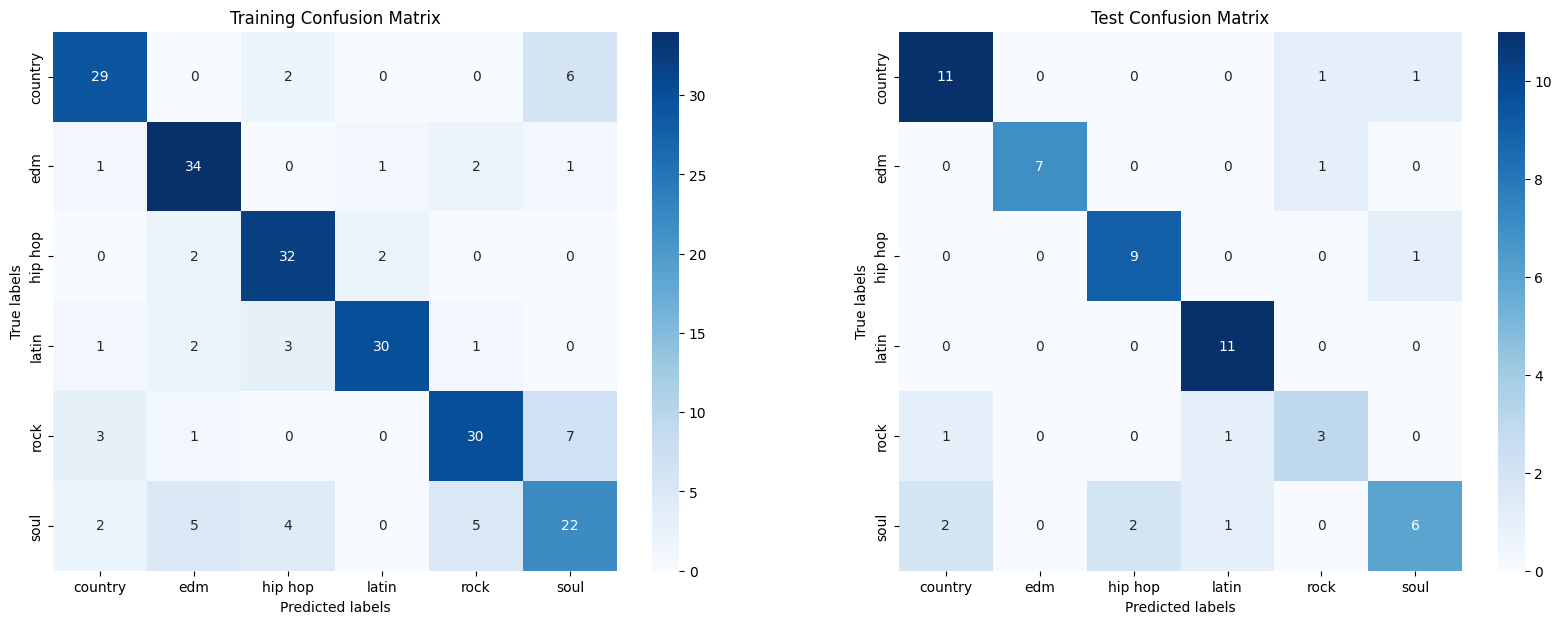

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [148]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

Best Parameters: {'C': 29.763514416313132, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.7758620689655172
SVM Classification Report:
              precision    recall  f1-score   support

     country       0.73      0.85      0.79        13
         edm       0.88      0.88      0.88         8
     hip hop       0.90      0.90      0.90        10
       latin       0.83      0.91      0.87        11
        rock       0.50      0.40      0.44         5
        soul       0.67      0.55      0.60        11

    accuracy                           0.78        58
   macro avg       0.75      0.75      0.75        58
weighted avg       0.77      0.78      0.77        58



Text(0.5, 1.0, 'Training Confusion Matrix')

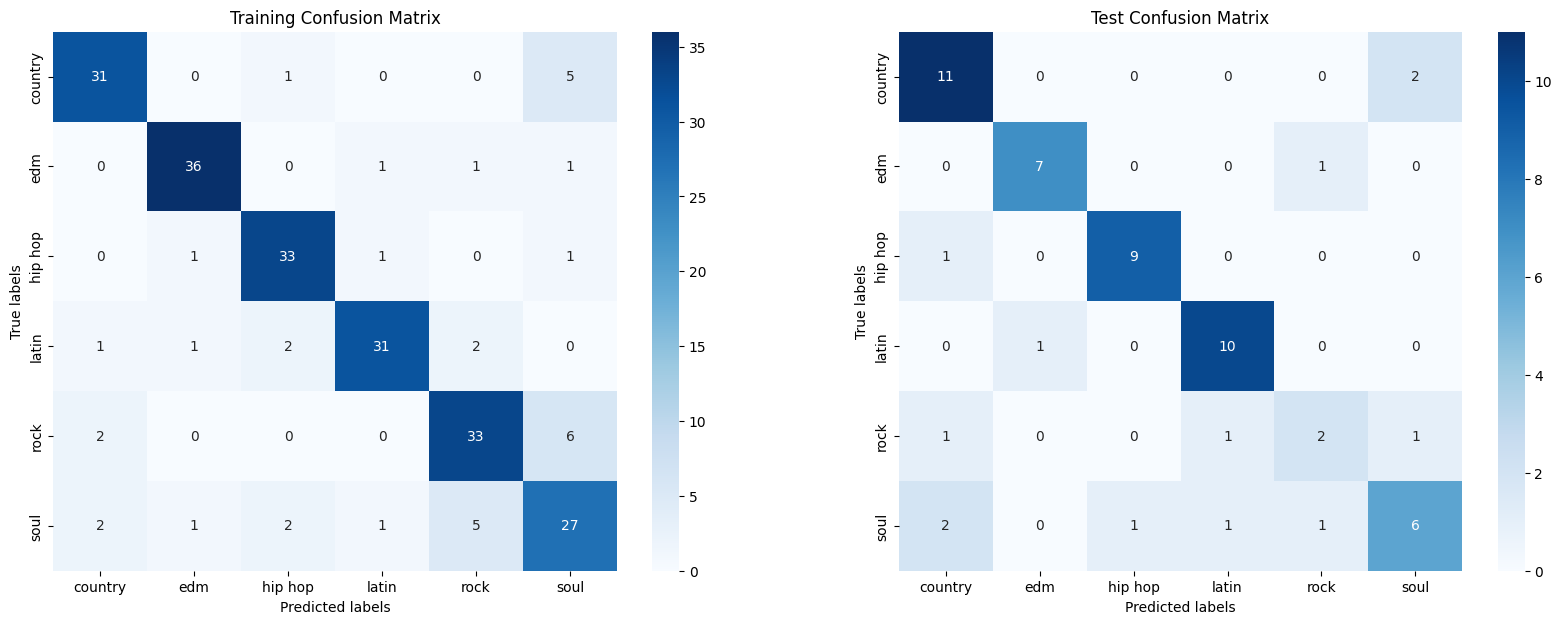

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(6, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [32, 64, 128],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [1, 2, 3],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)


In [143]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.688502 using {'batch_size': 32, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 32, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


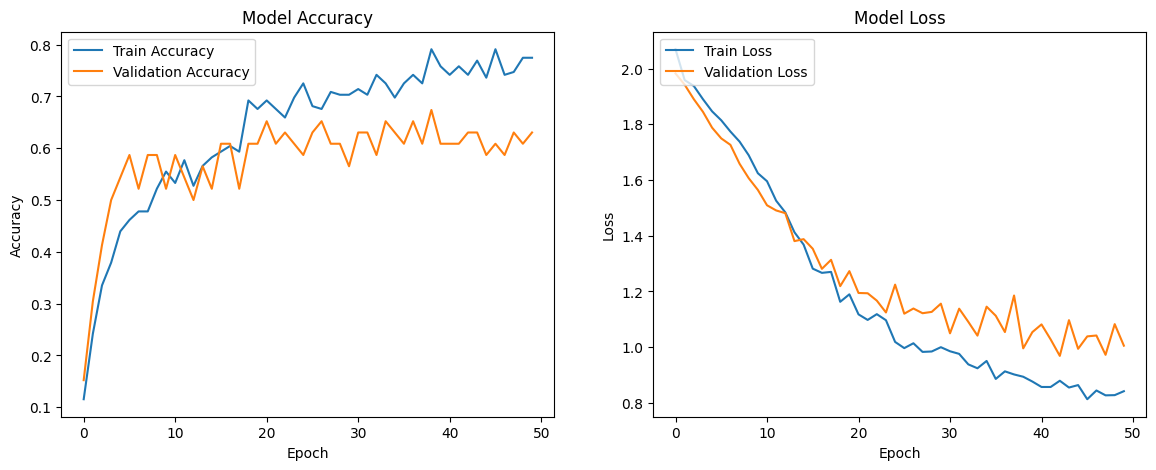

In [144]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [145]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, test_target_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7068965435028076


## Random Forest

In [53]:
# Perform Random Forest Classification on the artist dataset
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the Random Forest estimator and the parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, train_target_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [58]:
from sklearn.metrics import accuracy_score

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_rf = accuracy_score(test_target_encoded, y_pred_rf)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.7931034482758621
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       1.00      0.75      0.86         8
           2       0.82      0.90      0.86        10
           3       0.90      0.82      0.86        11
           4       0.50      0.40      0.44         5
           5       0.80      0.73      0.76        11

    accuracy                           0.79        58
   macro avg       0.79      0.75      0.76        58
weighted avg       0.80      0.79      0.79        58



Text(0.5, 1.0, 'Training Confusion Matrix')

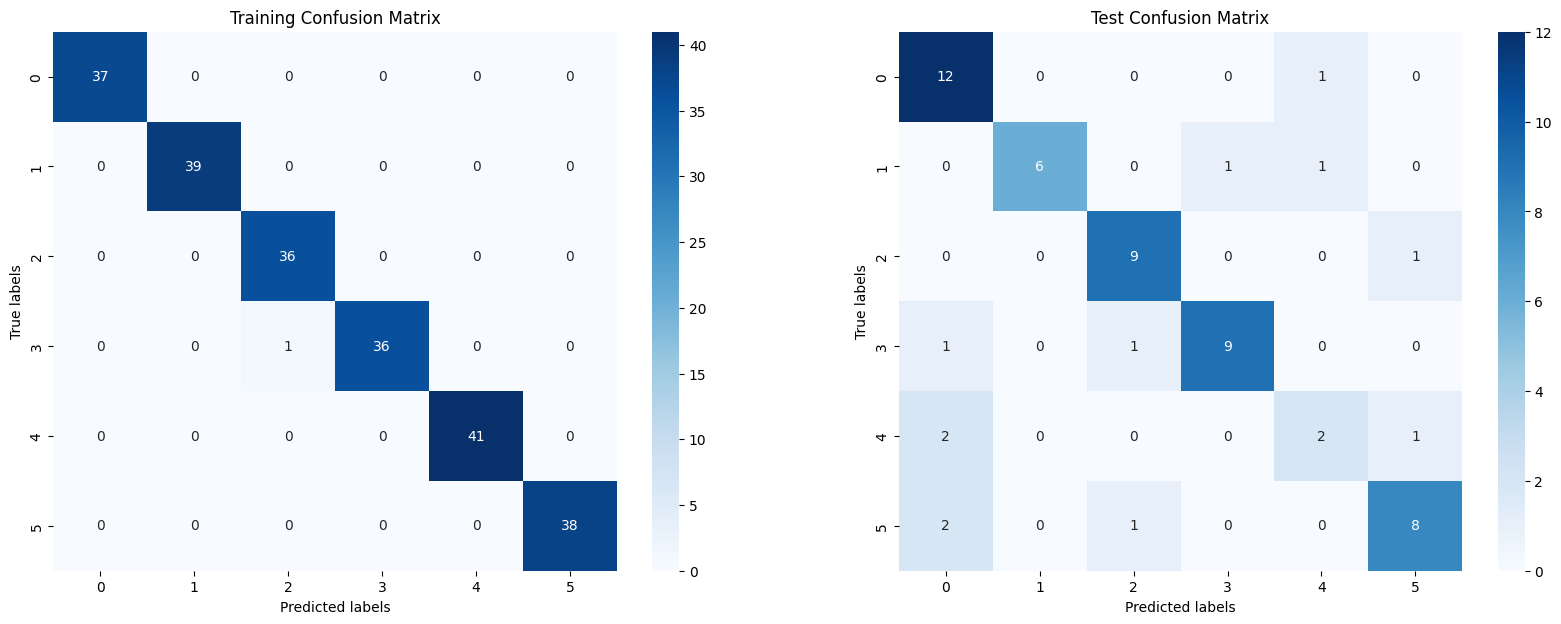

In [61]:
from sklearn.metrics import classification_report

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Test Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(test_target_encoded, y_pred_rf))

# draw confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# train confusion matrix
cm_train = confusion_matrix(train_target_encoded, grid_search_rf.predict(X_train))

# test confusion matrix
cm_test = confusion_matrix(test_target_encoded, y_pred_rf)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(test_target_encoded)), yticklabels=sorted(set(test_target_encoded)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(train_target_encoded)), yticklabels=sorted(set(train_target_encoded)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')


## XGBoost 

In [101]:
# Encode categorical 'genre' for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Change the key and major columns to numerical for input
X_train['key'] = X_train['key'].astype('int')
X_train['major'] = X_train['major'].astype('int')
X_test['key'] = X_test['key'].astype('int')
X_test['major'] = X_test['major'].astype('int')


In [102]:
import xgboost as xgb

# Setting up the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # Use for multi-class classification
    num_class=len(label_encoder.classes_),  # Specify number of classes
    random_state=42
)

# Training the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [104]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7068965517241379
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.83      0.62      0.71         8
           2       0.69      0.90      0.78        10
           3       0.75      0.55      0.63        11
           4       0.38      0.60      0.46         5
           5       0.78      0.64      0.70        11

    accuracy                           0.71        58
   macro avg       0.70      0.69      0.68        58
weighted avg       0.73      0.71      0.71        58



In [105]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Configuring the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Running grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [106]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_classification_report)


Test Set Accuracy: 0.7758620689655172
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.83      0.62      0.71         8
           2       0.82      0.90      0.86        10
           3       0.78      0.64      0.70        11
           4       0.67      0.80      0.73         5
           5       0.73      0.73      0.73        11

    accuracy                           0.78        58
   macro avg       0.77      0.77      0.76        58
weighted avg       0.78      0.78      0.77        58



## Comparison of the models

- Logistic Regression
    - Test Accuracy: 0.8103448275862069
    - Time: 3.2s
- SVM
    - Test Accuracy: 0.7758620689655172
    - Time: 3.4s
- Neural Network
    - Train Accuracy: 0.688502
    - Test Accuracy: 0.7068965435028076
    - Time: 11m 46.2.s
- Random Forest
    - Test Accuracy: 0.7931034482758621
    - Time: 1m 6.4s
- XGBoost
    - Test Accuracy: 0.7758620689655172
    - Time: 24.5s